# Top Brands positions 

In [187]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys

# Move two levels up (to the project root) and append the `src` folder
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Append src to sys.path
sys.path.append(src_path)

from src import query_engines, dataframe_visualizer

q = query_engines.QueryEngines()

In [209]:
START_DATE = "'2024-06-01'"
END_DATE = "'2024-10-01'"
DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE = 60 # how many days between the start date of the experiment and the first exposure table

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    'top_brands.sql'
    ,params=params
    ,to_load_file='top_brands'
    ,load_from_to_load_file='top_brands'
    
)

df  = q.query_run_starburst()


### Groceries

In [223]:
tmp = df.copy()

tmp = tmp.drop(columns=['origin','widget_id','widget_name','widget_app_location'])

tmp

START_DATE = "'2024-07-01'"
END_DATE = "'2024-10-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Groceries'
# cond4 = tmp['country'] == 'ES'
# cond5 = tmp['store_name'] == 'Supermercado DIA'

tmp = tmp[cond1 
          & cond2 
          & cond3 
        #   & cond4 
        #   & cond5
          ]

df_pivoted = pd.pivot_table(tmp,
                            values = ['n_events_wsi', 'n_events_sa', 'n_events_oc'],
                            index = 'p_creation_date',
                            columns = 'widget_horizontal_position',
                            aggfunc = 'sum'
                            )

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

df_pivoted

# CVR
df_pivoted['cvr_1'] = df_pivoted['n_events_oc__1'] / df_pivoted['n_events_wsi__1']
df_pivoted['cvr_2'] = df_pivoted['n_events_oc__2'] / df_pivoted['n_events_wsi__2']
df_pivoted['cvr_3'] = df_pivoted['n_events_oc__3'] / df_pivoted['n_events_wsi__3']
df_pivoted['cvr_4'] = df_pivoted['n_events_oc__4'] / df_pivoted['n_events_wsi__4']
df_pivoted['cvr_5'] = df_pivoted['n_events_oc__5'] / df_pivoted['n_events_wsi__5']
df_pivoted['cvr_6'] = df_pivoted['n_events_oc__6'] / df_pivoted['n_events_wsi__6']
df_pivoted['cvr_7'] = df_pivoted['n_events_oc__7'] / df_pivoted['n_events_wsi__7']
df_pivoted['cvr_8'] = df_pivoted['n_events_oc__8'] / df_pivoted['n_events_wsi__8']

# CTR
df_pivoted['ctr_1'] = df_pivoted['n_events_sa__1'] / df_pivoted['n_events_wsi__1']
df_pivoted['ctr_2'] = df_pivoted['n_events_sa__2'] / df_pivoted['n_events_wsi__2']
df_pivoted['ctr_3'] = df_pivoted['n_events_sa__3'] / df_pivoted['n_events_wsi__3']
df_pivoted['ctr_4'] = df_pivoted['n_events_sa__4'] / df_pivoted['n_events_wsi__4']
df_pivoted['ctr_5'] = df_pivoted['n_events_sa__5'] / df_pivoted['n_events_wsi__5']
df_pivoted['ctr_6'] = df_pivoted['n_events_sa__6'] / df_pivoted['n_events_wsi__6']
df_pivoted['ctr_7'] = df_pivoted['n_events_sa__7'] / df_pivoted['n_events_wsi__7']
df_pivoted['ctr_8'] = df_pivoted['n_events_sa__8'] / df_pivoted['n_events_wsi__8']

df_pivoted

,p_creation_date,n_events_oc__1,n_events_oc__2,n_events_oc__3,n_events_oc__4,n_events_oc__5,n_events_oc__6,n_events_oc__7,n_events_oc__8,n_events_sa__1,...,cvr_7,cvr_8,ctr_1,ctr_2,ctr_3,ctr_4,ctr_5,ctr_6,ctr_7,ctr_8
0,2024-07-29,18179,10386,5918,3574,1912,940,475,308,75980,...,0.004822,0.003574,0.383265,0.263716,0.184741,0.129650,0.091822,0.060091,0.042250,0.035359
1,2024-07-30,16578,9763,5416,3355,1887,939,492,342,71647,...,0.005184,0.004130,0.378496,0.263811,0.187387,0.132605,0.093112,0.062384,0.043255,0.037506
2,2024-07-31,16080,9525,5695,3220,1833,954,388,363,68636,...,0.004268,0.004572,0.374720,0.261049,0.188221,0.132514,0.092867,0.063052,0.040003,0.036573
3,2024-08-01,15916,9315,5555,3251,1781,916,418,294,69072,...,0.004818,0.003904,0.383322,0.266640,0.191167,0.134487,0.095011,0.064523,0.045430,0.037381
4,2024-08-02,16113,9651,5685,3106,1890,1021,479,299,69958,...,0.005432,0.003899,0.376584,0.261751,0.190055,0.131261,0.095730,0.067517,0.046064,0.037603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2024-09-26,20013,12434,6288,3658,2095,1002,560,452,81037,...,0.004974,0.004532,0.369519,0.264015,0.171487,0.115318,0.082762,0.056275,0.041012,0.038088
60,2024-09-27,21028,12986,6798,3937,2324,1122,666,476,83755,...,0.005572,0.004500,0.356573,0.255746,0.167591,0.111500,0.083473,0.056906,0.043559,0.037232
61,2024-09-28,24657,15406,7832,4396,2564,1202,762,580,100600,...,0.005496,0.004765,0.358850,0.257696,0.170200,0.112356,0.084291,0.056930,0.043043,0.040086
62,2024-09-29,21414,14365,7342,4106,2465,1161,685,551,99980,...,0.004495,0.004129,0.317577,0.232855,0.157615,0.105062,0.081796,0.057424,0.042452,0.038463


##### WSI

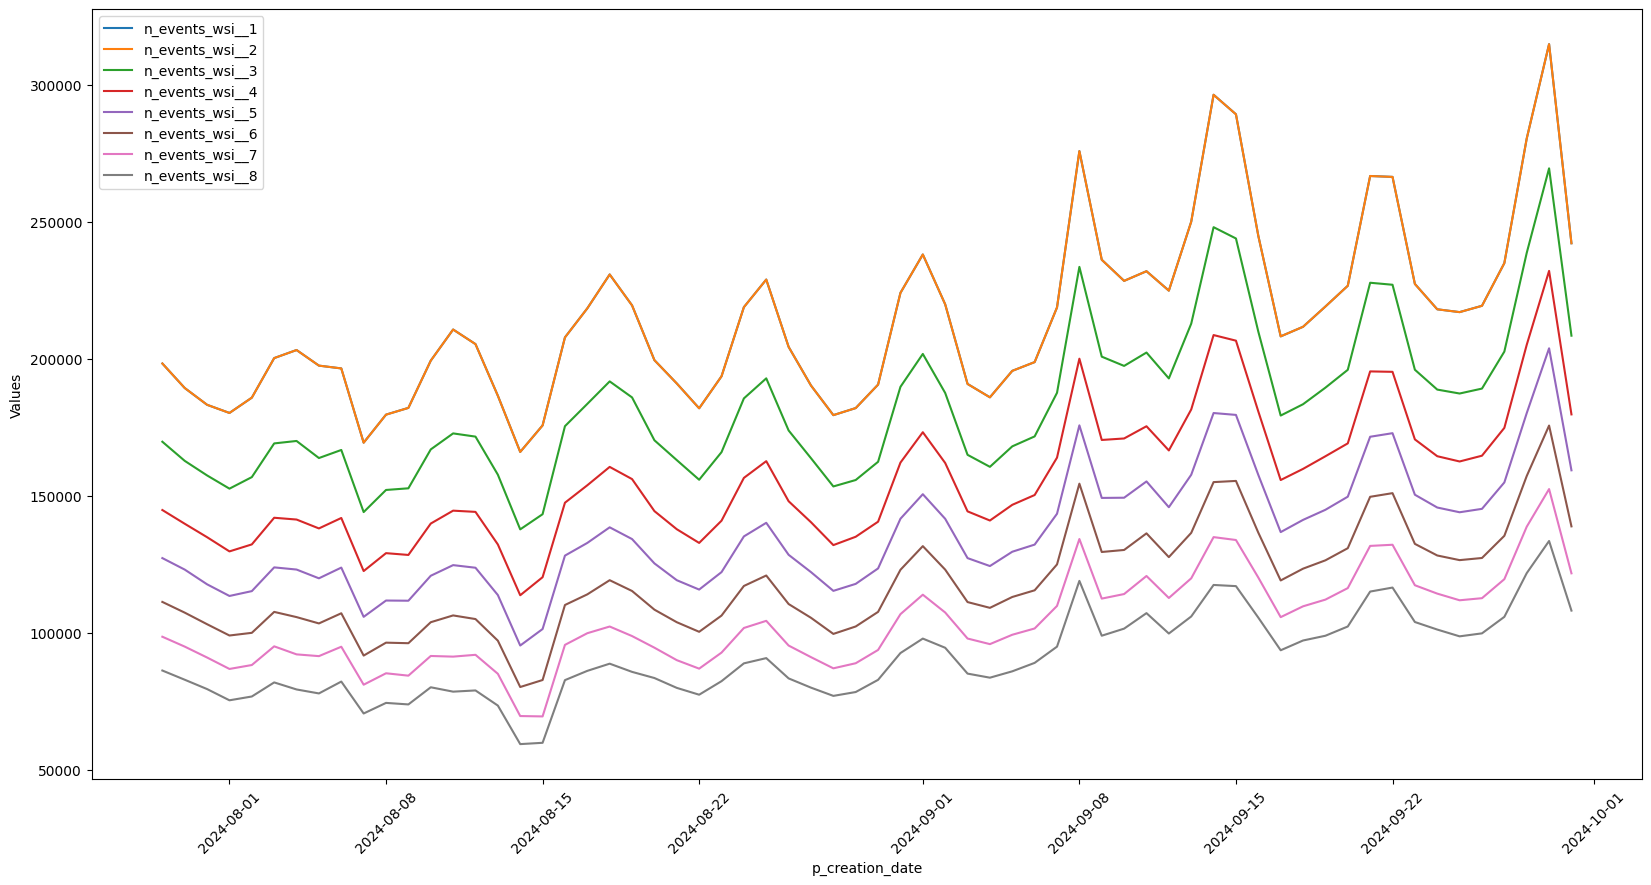

In [224]:
# STORE IMPRESSION EN WIDGET
v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date',
    y_columns=['n_events_wsi__1'
               ,'n_events_wsi__2'
               ,'n_events_wsi__3'
               ,'n_events_wsi__4'
               ,'n_events_wsi__5'
               ,'n_events_wsi__6'
               ,'n_events_wsi__7'
               ,'n_events_wsi__8'
               ]
)

##### ORDERS

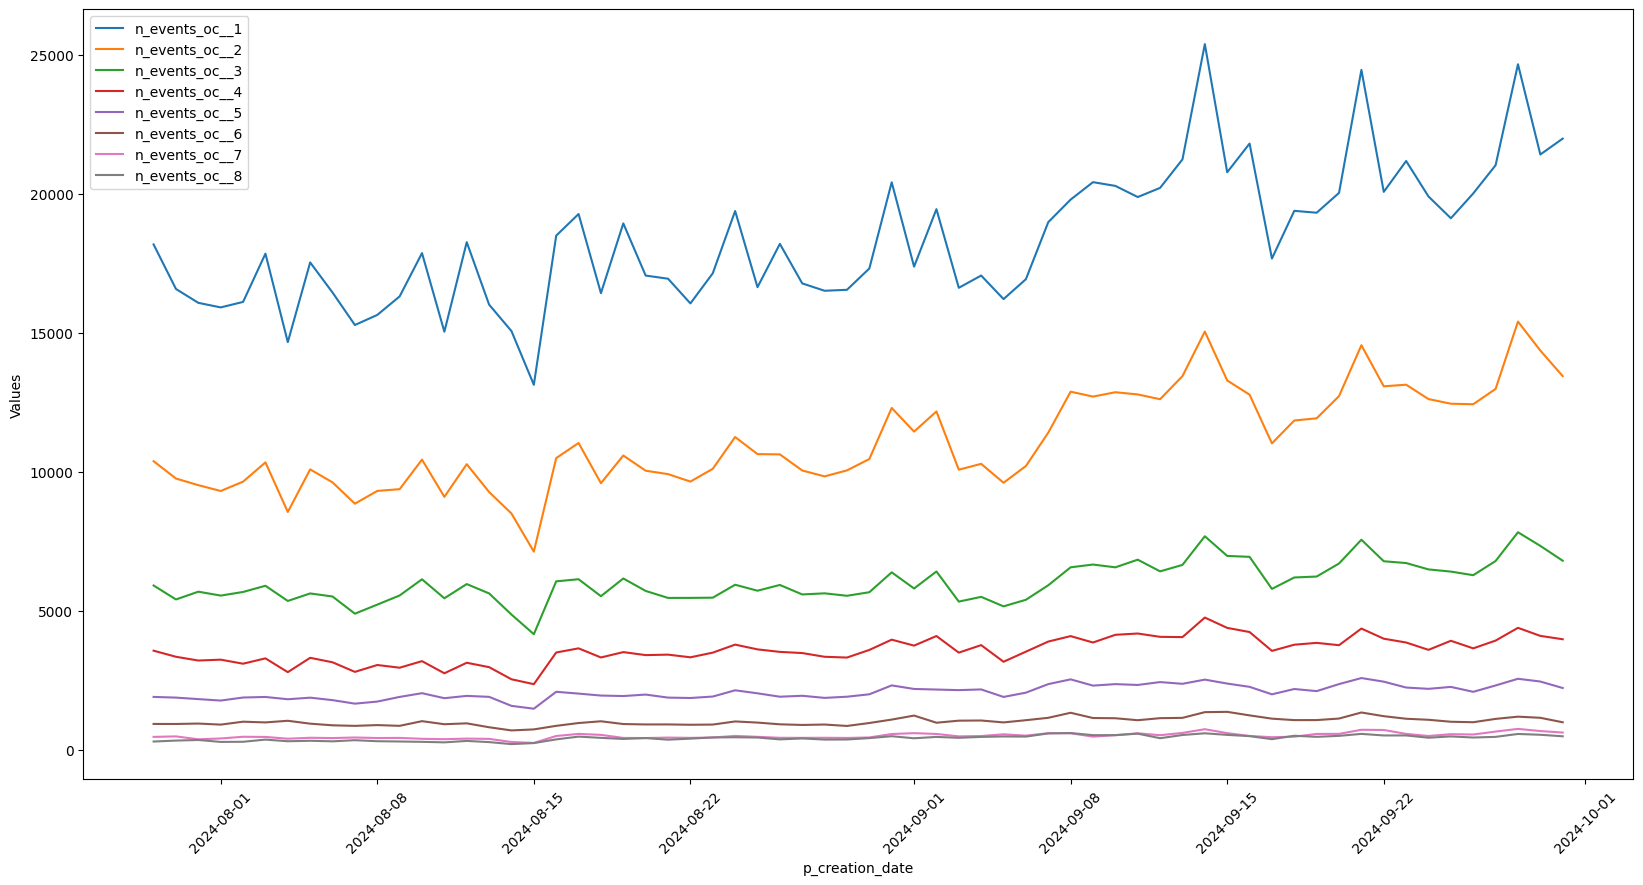

In [225]:
# ORDERS
v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date',
    y_columns=['n_events_oc__1'
               ,'n_events_oc__2'
               ,'n_events_oc__3'
               ,'n_events_oc__4'
               ,'n_events_oc__5'
               ,'n_events_oc__6'
               ,'n_events_oc__7'
               ,'n_events_oc__8'
               ]
)

##### CTR

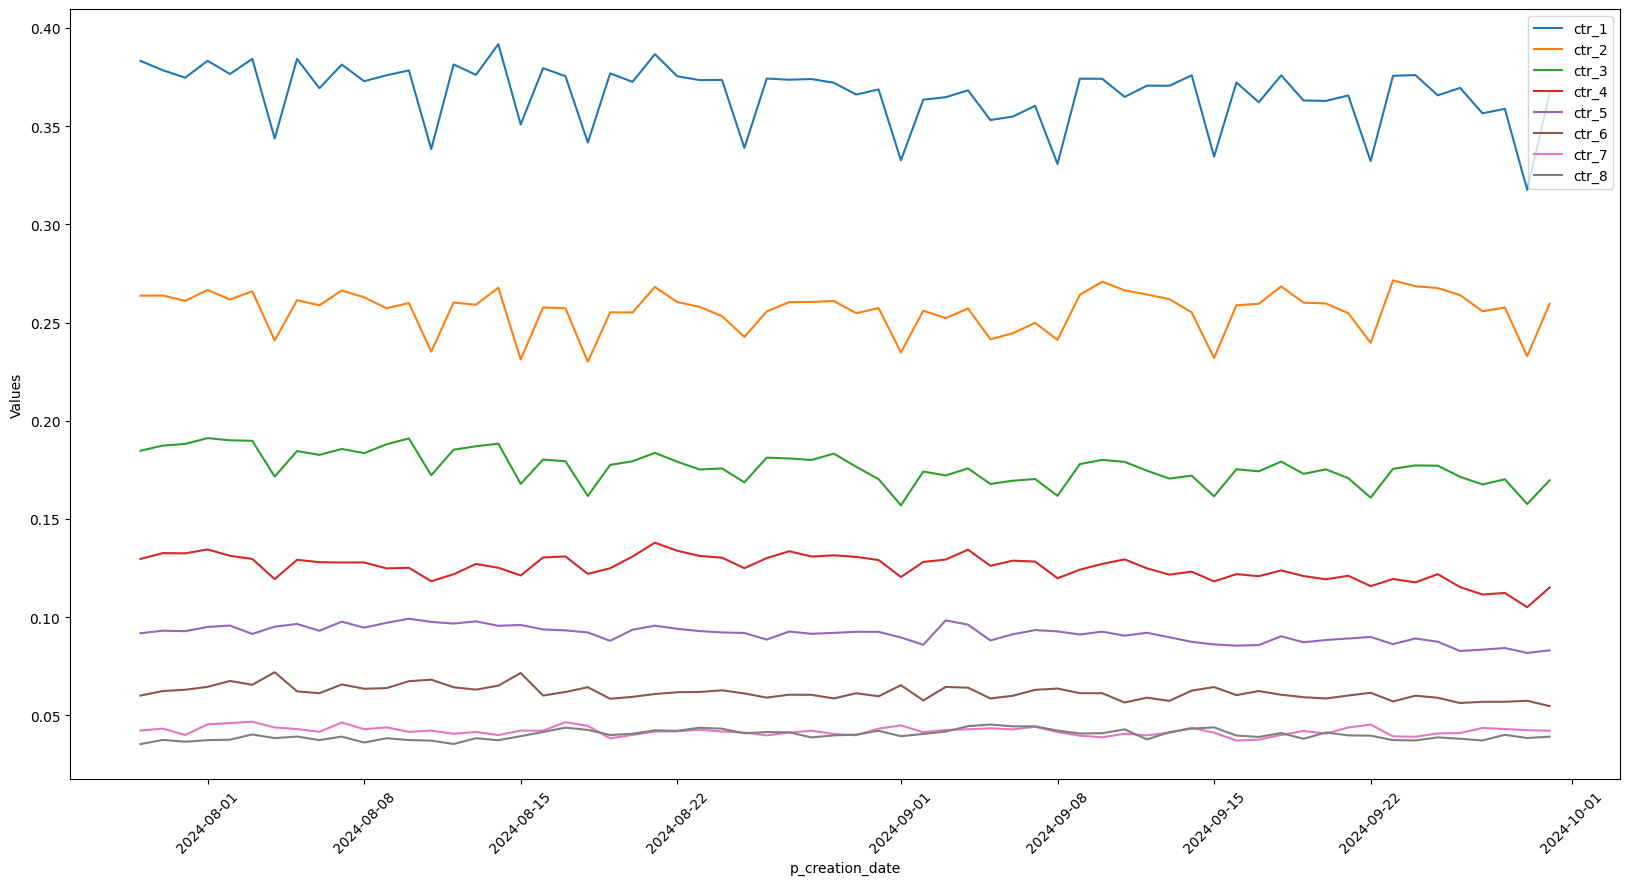

In [226]:
# CTR
v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date',
    y_columns=['ctr_1'
               ,'ctr_2'
               ,'ctr_3'
               ,'ctr_4' 
               ,'ctr_5'
               ,'ctr_6'
               ,'ctr_7'
               ,'ctr_8'
               ]
)

##### CVR

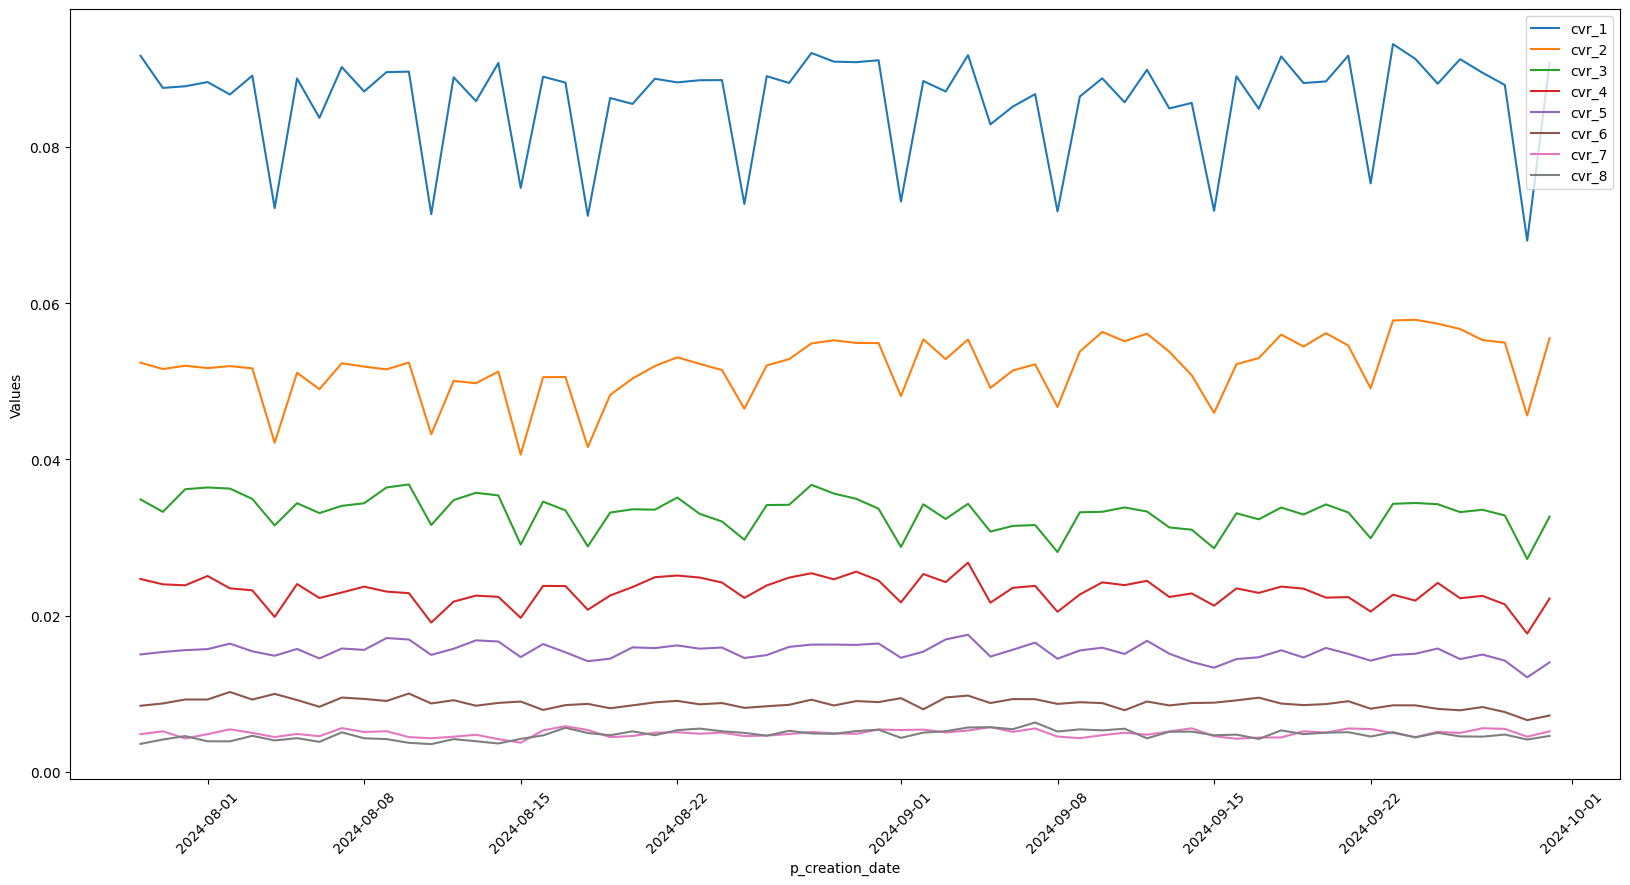

In [227]:
# CVR
v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date',
    y_columns=['cvr_1'
               ,'cvr_2'
               ,'cvr_3'
               ,'cvr_4' 
               ,'cvr_5'
               ,'cvr_6'
               ,'cvr_7'
               ,'cvr_8'
               ]
)

### Shops

In [228]:
tmp = df.copy()

tmp = tmp.drop(columns=['origin','widget_id','widget_name','widget_app_location'])

tmp

START_DATE = "'2024-07-01'"
END_DATE = "'2024-10-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Shops'
# cond4 = tmp['country'] == 'ES'
# cond5 = tmp['store_name'] == 'Supermercado DIA'

tmp = tmp[cond1 
          & cond2 
          & cond3 
        #   & cond4 
        #   & cond5
          ]

df_pivoted = pd.pivot_table(tmp,
                            values = ['n_events_wsi', 'n_events_sa', 'n_events_oc'],
                            index = 'p_creation_date',
                            columns = 'widget_horizontal_position',
                            aggfunc = 'sum'
                            )

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

df_pivoted

# CVR
df_pivoted['cvr_1'] = df_pivoted['n_events_oc__1'] / df_pivoted['n_events_wsi__1']
df_pivoted['cvr_2'] = df_pivoted['n_events_oc__2'] / df_pivoted['n_events_wsi__2']
df_pivoted['cvr_3'] = df_pivoted['n_events_oc__3'] / df_pivoted['n_events_wsi__3']
df_pivoted['cvr_4'] = df_pivoted['n_events_oc__4'] / df_pivoted['n_events_wsi__4']
df_pivoted['cvr_5'] = df_pivoted['n_events_oc__5'] / df_pivoted['n_events_wsi__5']
df_pivoted['cvr_6'] = df_pivoted['n_events_oc__6'] / df_pivoted['n_events_wsi__6']
df_pivoted['cvr_7'] = df_pivoted['n_events_oc__7'] / df_pivoted['n_events_wsi__7']
df_pivoted['cvr_8'] = df_pivoted['n_events_oc__8'] / df_pivoted['n_events_wsi__8']

# CTR
df_pivoted['ctr_1'] = df_pivoted['n_events_sa__1'] / df_pivoted['n_events_wsi__1']
df_pivoted['ctr_2'] = df_pivoted['n_events_sa__2'] / df_pivoted['n_events_wsi__2']
df_pivoted['ctr_3'] = df_pivoted['n_events_sa__3'] / df_pivoted['n_events_wsi__3']
df_pivoted['ctr_4'] = df_pivoted['n_events_sa__4'] / df_pivoted['n_events_wsi__4']
df_pivoted['ctr_5'] = df_pivoted['n_events_sa__5'] / df_pivoted['n_events_wsi__5']
df_pivoted['ctr_6'] = df_pivoted['n_events_sa__6'] / df_pivoted['n_events_wsi__6']
df_pivoted['ctr_7'] = df_pivoted['n_events_sa__7'] / df_pivoted['n_events_wsi__7']
df_pivoted['ctr_8'] = df_pivoted['n_events_sa__8'] / df_pivoted['n_events_wsi__8']

df_pivoted

,p_creation_date,n_events_oc__1,n_events_oc__2,n_events_oc__3,n_events_oc__4,n_events_oc__5,n_events_oc__6,n_events_oc__7,n_events_oc__8,n_events_sa__1,...,cvr_7,cvr_8,ctr_1,ctr_2,ctr_3,ctr_4,ctr_5,ctr_6,ctr_7,ctr_8
0,2024-07-29,1277,920,461,353,138,89,48,25,8856,...,0.002929,0.001845,0.182643,0.162054,0.108046,0.094657,0.074165,0.055539,0.043510,0.034394
1,2024-07-30,1182,901,439,362,144,100,51,31,8623,...,0.003004,0.002350,0.174707,0.157152,0.108994,0.094359,0.077636,0.062089,0.048589,0.034945
2,2024-07-31,1209,850,506,355,144,87,49,37,8582,...,0.002843,0.002607,0.175868,0.156655,0.105808,0.095680,0.072001,0.056719,0.043690,0.040654
3,2024-08-01,1219,958,508,354,164,76,49,35,8935,...,0.002682,0.002311,0.167488,0.153295,0.108957,0.094874,0.074137,0.055092,0.044494,0.038695
4,2024-08-02,1171,913,405,369,135,80,39,36,8653,...,0.002318,0.002584,0.173860,0.149203,0.107272,0.095672,0.070366,0.057282,0.046054,0.045432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2024-09-26,505,421,223,149,122,94,40,27,6827,...,0.002181,0.001730,0.104702,0.093461,0.081337,0.070725,0.067578,0.057019,0.049509,0.042734
60,2024-09-27,525,467,273,153,148,83,45,37,7125,...,0.002209,0.002143,0.100241,0.090341,0.078879,0.062957,0.065237,0.058238,0.042565,0.041809
61,2024-09-28,611,483,291,158,167,87,45,25,7886,...,0.002037,0.001335,0.095564,0.089361,0.077989,0.065679,0.062945,0.059494,0.040929,0.043894
62,2024-09-29,362,329,168,103,83,58,40,25,6604,...,0.001978,0.001455,0.077149,0.071585,0.064067,0.053529,0.053993,0.046242,0.038418,0.043769


##### WSI

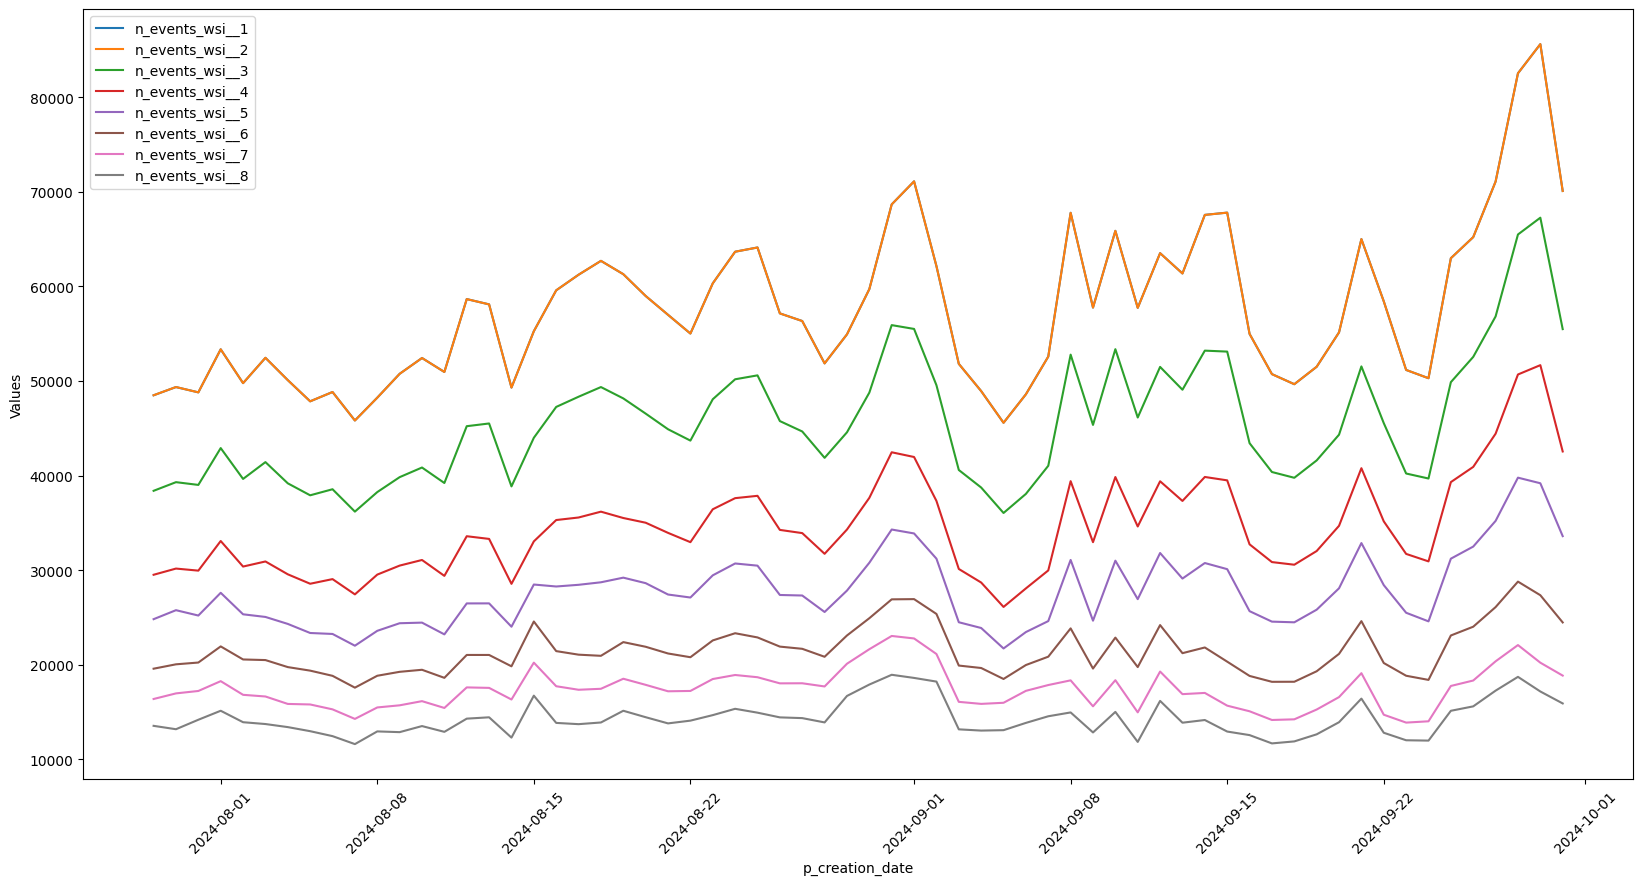

In [229]:
# STORE IMPRESSION EN WIDGET
v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date',
    y_columns=['n_events_wsi__1'
               ,'n_events_wsi__2'
               ,'n_events_wsi__3'
               ,'n_events_wsi__4'
               ,'n_events_wsi__5'
               ,'n_events_wsi__6'
               ,'n_events_wsi__7'
               ,'n_events_wsi__8'
               ]
)

##### ORDERS

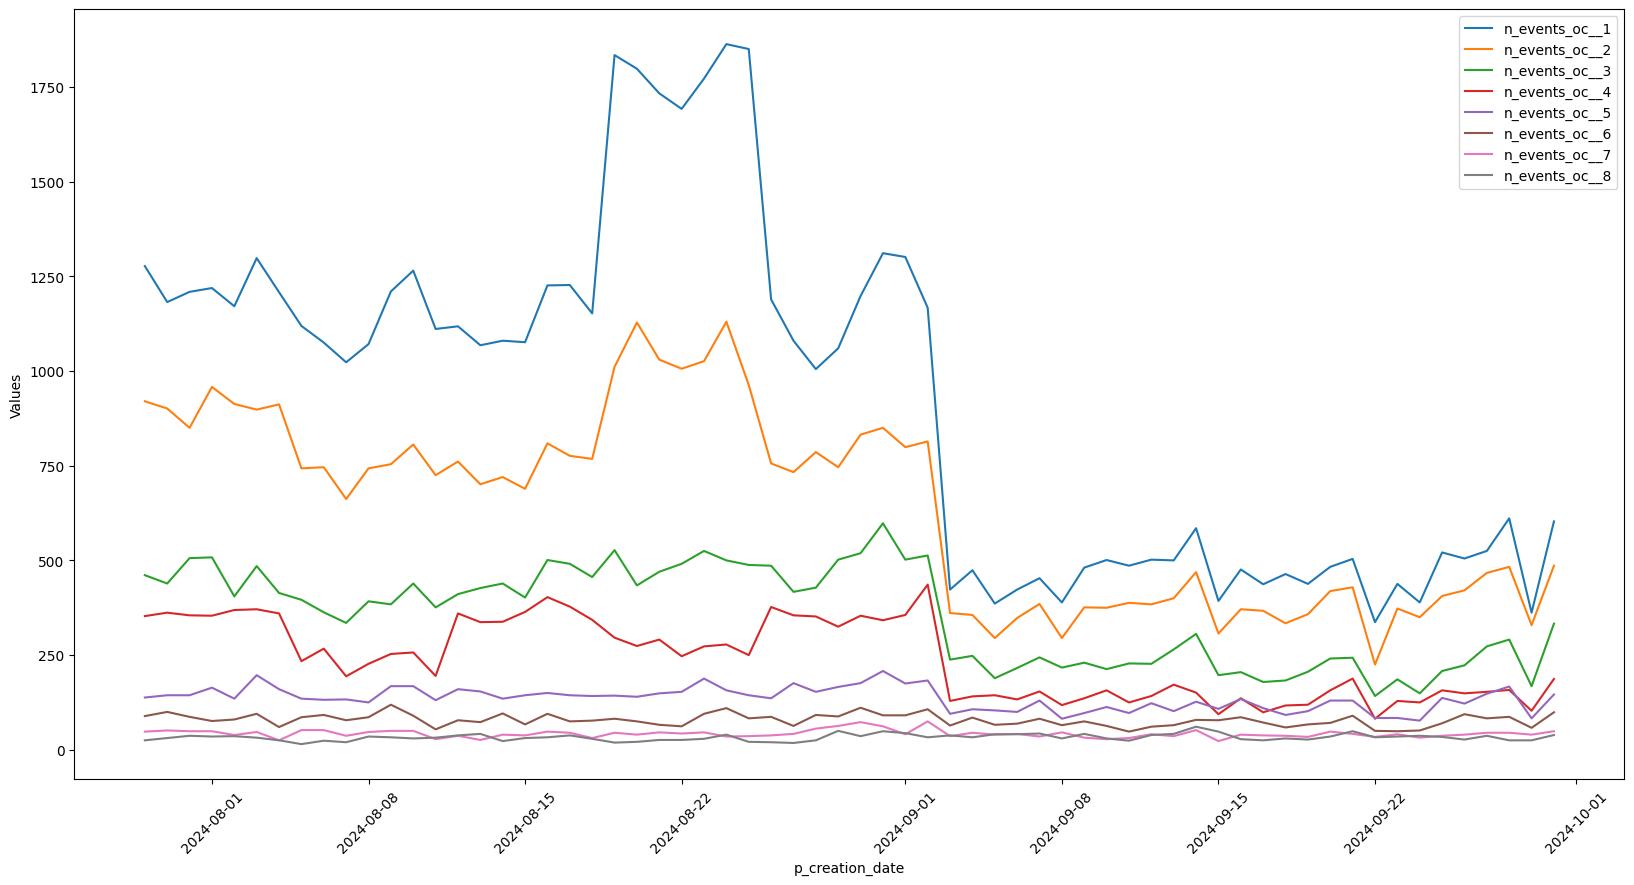

In [230]:
# ORDERS
v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date',
    y_columns=['n_events_oc__1'
               ,'n_events_oc__2'
               ,'n_events_oc__3'
               ,'n_events_oc__4'
               ,'n_events_oc__5'
               ,'n_events_oc__6'
               ,'n_events_oc__7'
               ,'n_events_oc__8'
               ]
)

##### CTR

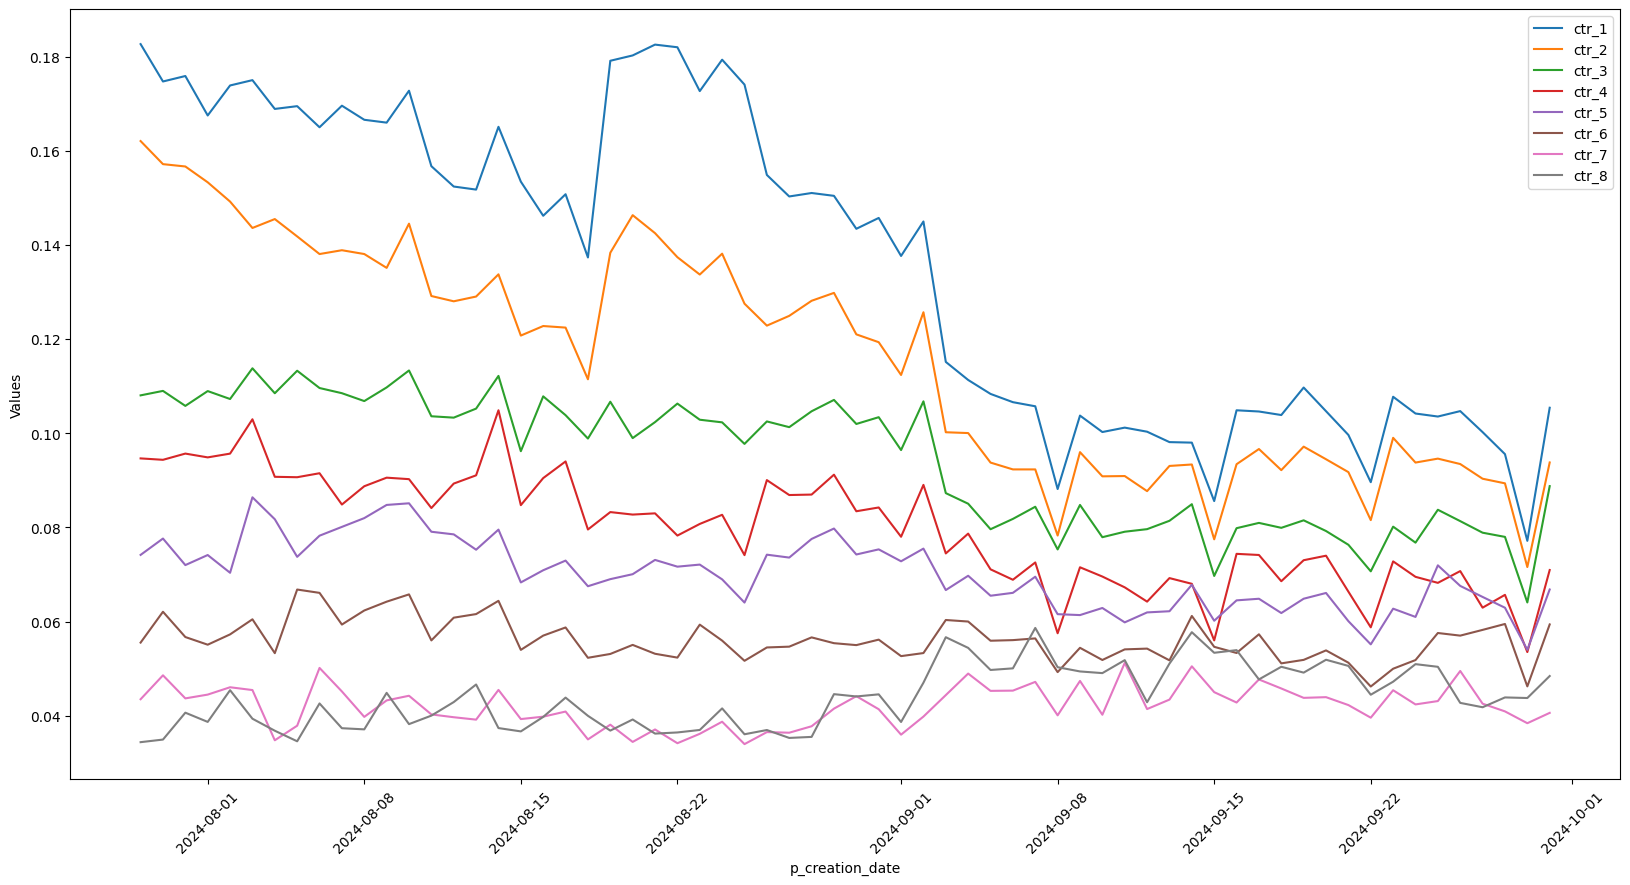

In [231]:
# CTR
v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date',
    y_columns=['ctr_1'
               ,'ctr_2'
               ,'ctr_3'
               ,'ctr_4' 
               ,'ctr_5'
               ,'ctr_6'
               ,'ctr_7'
               ,'ctr_8'
               ]
)

##### CVR

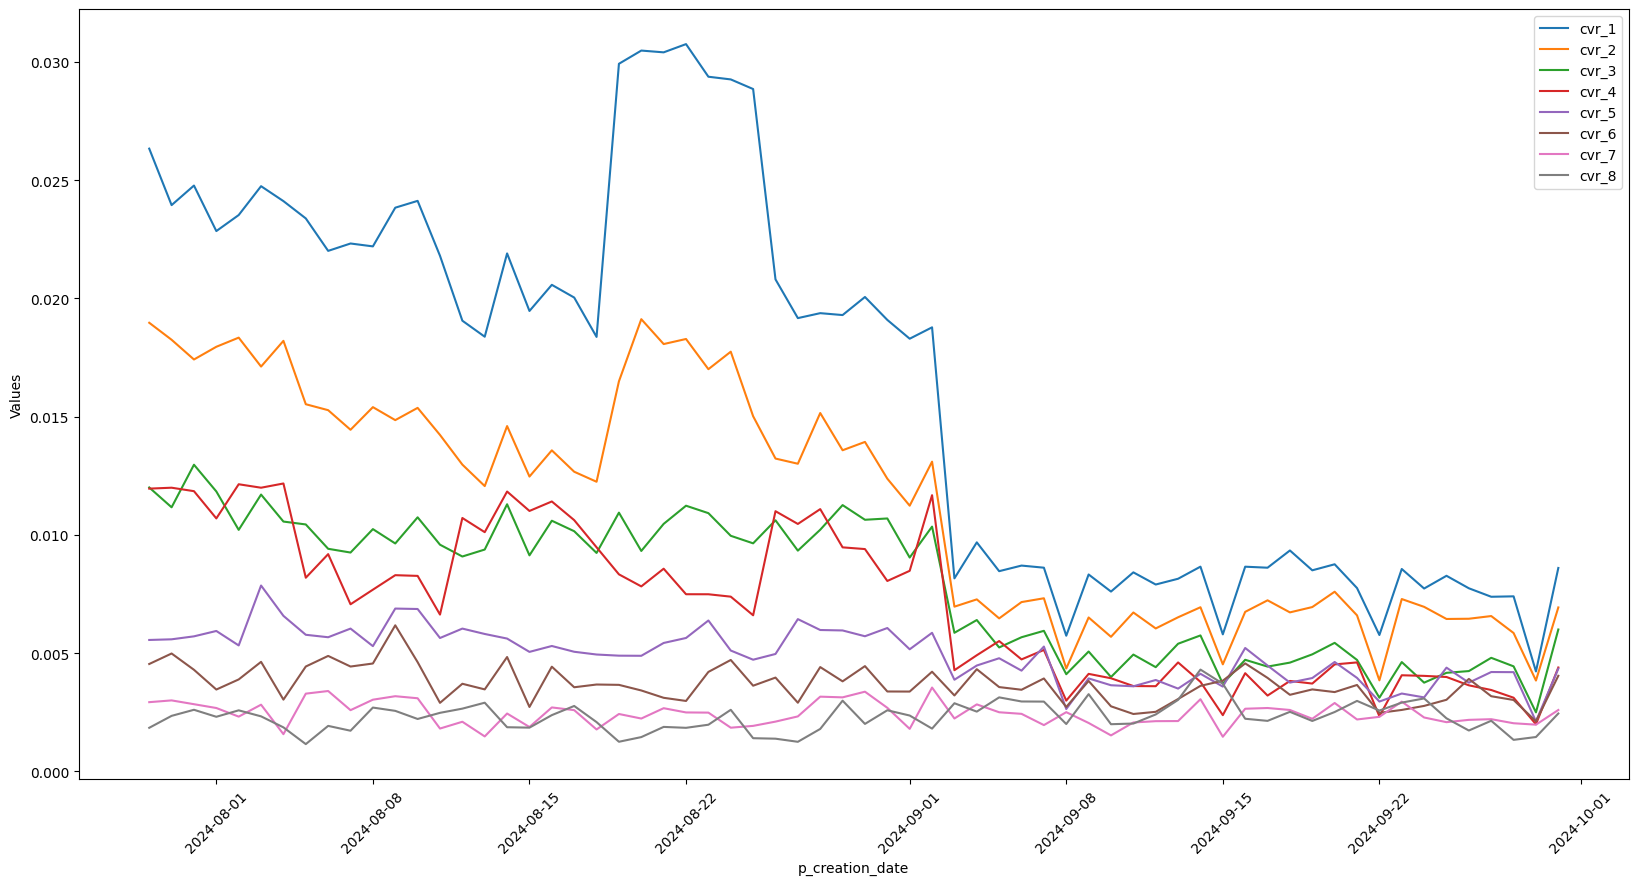

In [232]:
# CVR
v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date',
    y_columns=['cvr_1'
               ,'cvr_2'
               ,'cvr_3'
               ,'cvr_4' 
               ,'cvr_5'
               ,'cvr_6'
               ,'cvr_7'
               ,'cvr_8'
               ]
)